# kaggle sms competition
https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
# LSTM with dropout for sequence classification 
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation, SpatialDropout1D, Dropout
from keras.layers import LSTM
from keras.preprocessing import sequence,text
from keras.layers.embeddings import Embedding
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
# read data from tsv file
df = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['label', 'message'])

In [3]:
#transform label ham, spam => 0, 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [4]:
# Add a new column message-length
df['length'] = df['message'].apply(len)

Let's  take a look at the data now

In [5]:
df.head()

,label,message,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Let's try to figure, how length of the sms affects correlates to spam/ham

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ab0c907f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4ab0c60198>], dtype=object)

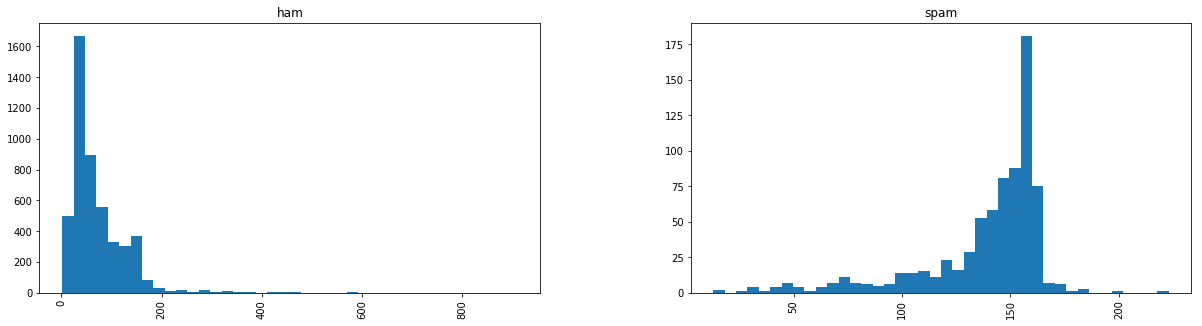

In [6]:
df.hist(column = 'length', by='label', bins=40, figsize=(20,5))

From the above graoh we see that spam messages are generally longer than ham messages. max length of majority of messages is 200

In [7]:
X = df['message']
Y = df['label_num']

Let's convert text to sequence for further processing

In [8]:
tk = text.Tokenizer(lower=True)

# train the tokenizer on the sms data that we have
tk.fit_on_texts(X)

# convert text to sequence using the training done in previous step 
x = tk.texts_to_sequences(X)

max_len = 200

# make the items in the sequence of same size of max_len so that we can process them
x = sequence.pad_sequences(x, maxlen=max_len)

In [24]:
max_features = 200
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(SpatialDropout1D(rate=0.2))
# model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
model.fit(x, y=Y, batch_size=500, epochs=6, verbose=1, validation_split=0.2, shuffle=True)

Train on 4457 samples, validate on 1115 samples
Epoch 1/6
4457/4457 [==============================] - 3s - loss: 0.4406 - acc: 0.8394 - val_loss: 0.1707 - val_acc: 0.9274
Epoch 2/6
4457/4457 [==============================] - 3s - loss: 0.1791 - acc: 0.9385 - val_loss: 0.1218 - val_acc: 0.9578
Epoch 3/6
4457/4457 [==============================] - 3s - loss: 0.1355 - acc: 0.9594 - val_loss: 0.0970 - val_acc: 0.9704
Epoch 4/6
4457/4457 [==============================] - 3s - loss: 0.1098 - acc: 0.9659 - val_loss: 0.0912 - val_acc: 0.9740
Epoch 5/6
4457/4457 [==============================] - 3s - loss: 0.0827 - acc: 0.9755 - val_loss: 0.0803 - val_acc: 0.9767
Epoch 6/6
4457/4457 [==============================] - 3s - loss: 0.0719 - acc: 0.9785 - val_loss: 0.0815 - val_acc: 0.9812


In [27]:
scores = model.evaluate(x, Y)

5572/5572 [==============================] - 10s    


In [28]:
print(model.metrics_names[1] , ':' , round(scores[1]*100, 2), '%')

acc : 98.44 %


In [16]:
print(X[0])
print(model.predict(x[:1]))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[[ 0.00017238]]


In [42]:
validation_sms = ['Hello how are you', 
                  'Pay only Rs 699. Free Thyroid(TSH,T3,T4). Missed Call HealthiansΛ¡ 8287161273']

In [43]:
temp = tk.texts_to_sequences(validation_sms)
validation_sms_sequence = sequence.pad_sequences(temp, maxlen=max_len)

In [44]:
model.predict(validation_sms_sequence[:len(validation_sms)])

array([[ 0.00651973],
       [ 0.70757222]], dtype=float32)